# Section 1

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Model building & preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

# Evaluation metrics & visualizations
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report,
    RocCurveDisplay,
    roc_auc_score,
)

# Optional: set a clean, readable plotting style
sns.set(style="whitegrid")

# Load the credit risk dataset from a local CSV into a DataFrame
tabla = pd.read_csv("credit_risk_data-1.csv")

# Quick sanity check: preview the first rows to inspect columns and data types
tabla.head()


,application_id,application_date,loan_amount,annual_income,employment_years,job_stability_score,credit_score,credit_utilization,payment_history_score,open_credit_lines,debt_to_income_ratio,savings_ratio,asset_value,age,education_level,marital_status,residential_stability,loan_status
0,APP_2328,2022-01-01,132221.82,60451.82,6.6,0.898,679,0.106,0.876,1,0.451,0.500,352569.55,41,High School,Married,3.5,0
1,APP_558,2022-01-01,134906.42,114634.08,10.3,0.808,718,0.030,0.719,4,0.090,0.235,224364.21,46,Masters,Divorced,11.4,0
2,APP_2477,2022-01-01,30285.19,82772.53,12.1,0.964,768,0.174,0.775,6,0.201,0.172,514765.55,44,High School,Widowed,8.6,0
3,APP_741,2022-01-01,32516.09,94023.36,9.1,0.690,670,0.141,0.993,3,0.322,0.368,182541.72,26,Bachelors,Single,3.9,0
4,APP_145,2022-01-02,77900.99,53515.02,7.2,0.679,651,0.097,0.946,2,0.222,0.324,223691.29,50,Associates,Single,9.6,0


In [ ]:
# Shows a brief summary of the dataset:
# - Column names and data types
# - How many non-missing values each column has
tabla.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   application_id         2500 non-null   object 
 1   application_date       2500 non-null   object 
 2   loan_amount            2500 non-null   float64
 3   annual_income          2500 non-null   float64
 4   employment_years       2500 non-null   float64
 5   job_stability_score    2500 non-null   float64
 6   credit_score           2500 non-null   int64  
 7   credit_utilization     2500 non-null   float64
 8   payment_history_score  2500 non-null   float64
 9   open_credit_lines      2500 non-null   int64  
 10  debt_to_income_ratio   2500 non-null   float64
 11  savings_ratio          2500 non-null   float64
 12  asset_value            2500 non-null   float64
 13  age                    2500 non-null   int64  
 14  education_level        2500 non-null   object 
 15  mari

In [ ]:
# Displays descriptive statistics for all columns:
# - For numeric columns: count, mean, std, min, quartiles, max
# - For categorical columns: count, number of unique values, most frequent value
tabla.describe(include="all")


,application_id,application_date,loan_amount,annual_income,employment_years,job_stability_score,credit_score,credit_utilization,payment_history_score,open_credit_lines,debt_to_income_ratio,savings_ratio,asset_value,age,education_level,marital_status,residential_stability,loan_status
count,2500,2500,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500,2500,2500.000000,2500.000000
unique,2500,958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,NaN,NaN
top,APP_2150,2024-11-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bachelors,Married,NaN,NaN
freq,1,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,834,1311,NaN,NaN
mean,NaN,NaN,155716.305344,67707.807596,6.675640,0.634643,681.728400,0.358176,0.740733,3.451600,0.408094,0.320784,175666.741236,42.045600,NaN,NaN,6.023200,0.265600
std,NaN,NaN,149605.357952,27302.931731,3.488021,0.293276,88.683309,0.289995,0.285966,2.083793,0.224736,0.192079,182652.568930,12.092395,NaN,NaN,3.205397,0.441741
min,NaN,NaN,5000.000000,15000.000000,0.000000,0.011000,334.000000,0.004000,0.029000,0.000000,0.009000,0.000000,550.630000,18.000000,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,42984.517500,47475.317500,4.000000,0.375500,642.750000,0.131000,0.517500,2.000000,0.228000,0.161000,49513.082500,34.000000,NaN,NaN,3.600000,0.000000
50%,NaN,NaN,97054.315000,66963.475000,6.700000,0.752000,700.000000,0.246000,0.880500,3.000000,0.359000,0.327000,121018.750000,42.000000,NaN,NaN,5.900000,0.000000
75%,NaN,NaN,213214.992500,87347.642500,9.300000,0.866000,743.000000,0.592250,0.956000,5.000000,0.565000,0.464000,235513.902500,50.000000,NaN,NaN,8.400000,1.000000


### Write a brief summary of your initial findings

### Write a brief summary of your initial findings

After the first exploratory review, we observe a dataset with no missing values, containing 2,500 records and 18 columns. The variables include numerical values, such as annual income, and categorical ones, such as education level.


# Section 2

In [ ]:
# Shows the distribution of the target variable (loan_status)
# normalize=True returns the proportions instead of raw counts
tabla["loan_status"].value_counts(normalize=True)



,proportion
loan_status,
0,0.7344
1,0.2656


Count by class:
loan_status
0    1836
1     664
Name: count, dtype: int64

Percentage by class (%):
loan_status
0    73.44
1    26.56
Name: proportion, dtype: float64


/tmp/ipython-input-2023639896.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  eje.set_xticklabels(["No default (0)", "Default (1)"])


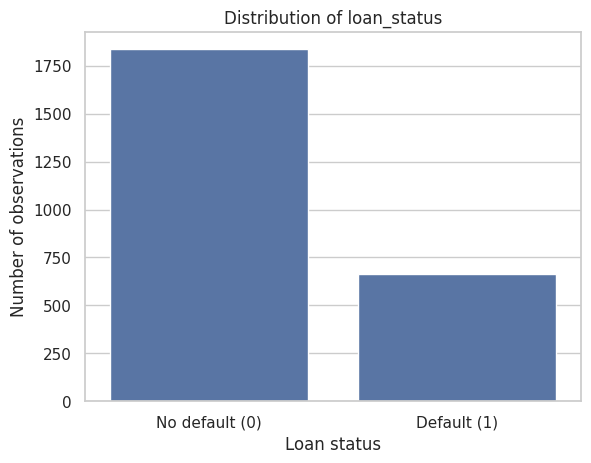

In [ ]:
# Count how many observations belong to each class
conteo_prestamos = tabla["loan_status"].value_counts()

# Calculate the percentage distribution of each class
porcentaje_prestamos = tabla["loan_status"].value_counts(normalize=True) * 100

print("Count by class:")
print(conteo_prestamos)
print("\nPercentage by class (%):")
print(porcentaje_prestamos)

# Plot the class distribution
figura, eje = plt.subplots()
sns.countplot(data=tabla, x="loan_status", ax=eje)

# Rename axis labels for clarity
eje.set_xticklabels(["No default (0)", "Default (1)"])
eje.set_title("Distribution of loan_status")
eje.set_xlabel("Loan status")
eje.set_ylabel("Number of observations")

plt.show()


/tmp/ipython-input-3141075875.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-3141075875.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ejes[1].set_xticklabels(["No default (0)", "Default (1)"])


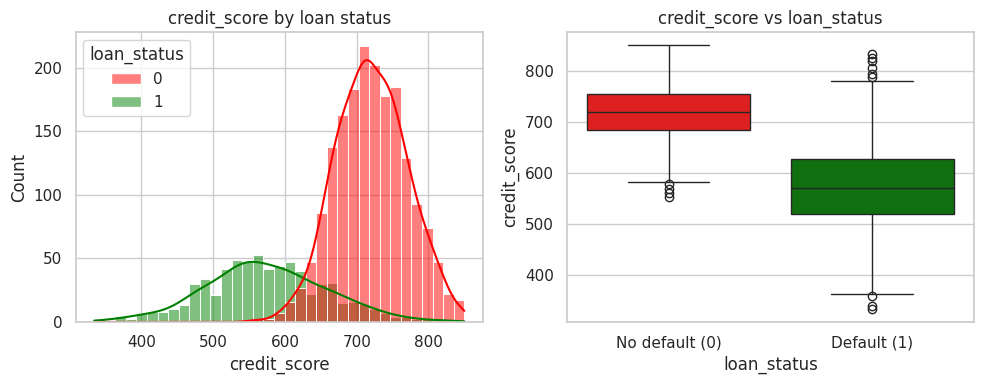

/tmp/ipython-input-3141075875.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-3141075875.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ejes[1].set_xticklabels(["No default (0)", "Default (1)"])


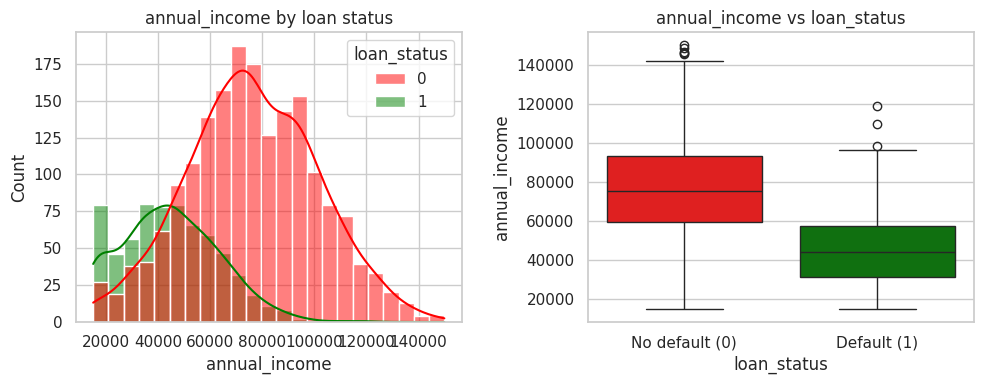

/tmp/ipython-input-3141075875.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-3141075875.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ejes[1].set_xticklabels(["No default (0)", "Default (1)"])


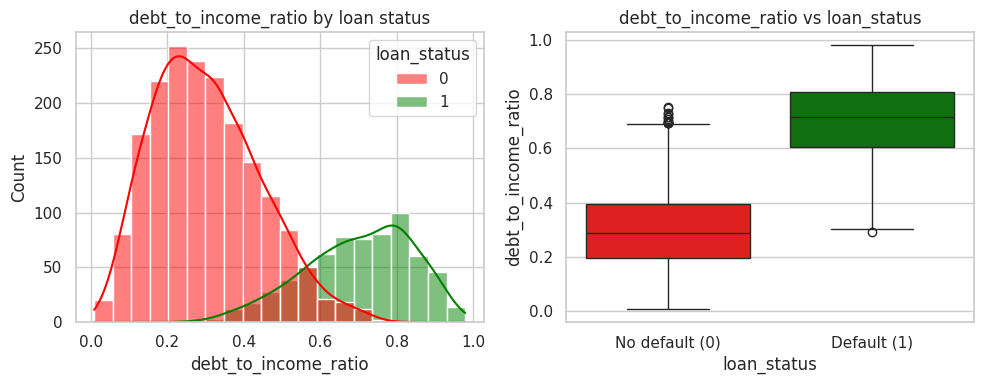

In [ ]:
# For each continuous variable, create two plots:
# 1) A histogram (with KDE) comparing the distributions by loan_status
# 2) A boxplot showing how the variable differs between the two classes
variables_continuas = ["credit_score", "annual_income", "debt_to_income_ratio"]

for columna in variables_continuas:
    figura, ejes = plt.subplots(1, 2, figsize=(10, 4))

    # Histogram: distribution split by loan_status
    sns.histplot(
        data=tabla,
        x=columna,
        hue="loan_status",
        kde=True,
        ax=ejes[0],
        palette=["red", "green"]
    )
    ejes[0].set_title(f"{columna} by loan status")

    # Boxplot: compare median and spread between classes
    sns.boxplot(
        data=tabla,
        x="loan_status",
        y=columna,
        ax=ejes[1],
        palette=["red", "green"]
    )
    ejes[1].set_title(f"{columna} vs loan_status")
    ejes[1].set_xticklabels(["No default (0)", "Default (1)"])

    plt.tight_layout()
    plt.show()


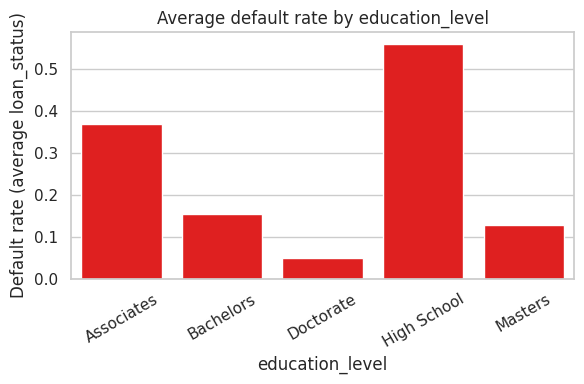

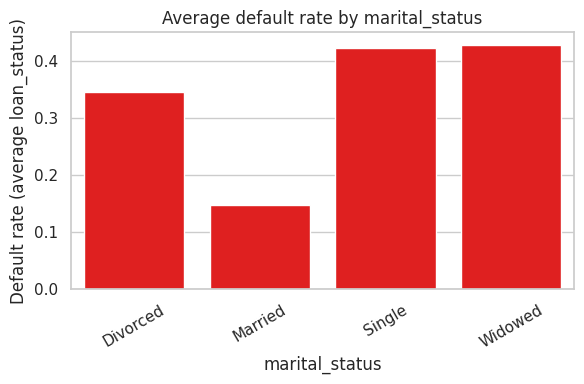

In [ ]:
# For each categorical variable, calculate and plot the average default rate
variables_categoricas = ["education_level", "marital_status"]

for columna in variables_categoricas:
    # Compute the mean of loan_status for each category (default rate)
    tasa_default = tabla.groupby(columna)["loan_status"].mean().reset_index()

    figura, eje = plt.subplots(figsize=(6, 4))

    # Bar plot showing the average default rate for each category
    sns.barplot(
        data=tasa_default,
        x=columna,
        y="loan_status",
        ax=eje,
        color="red"
    )

    eje.set_title(f"Average default rate by {columna}")
    eje.set_ylabel("Default rate (average loan_status)")

    plt.xticks(rotation=30)  # rotate labels for readability
    plt.tight_layout()
    plt.show()


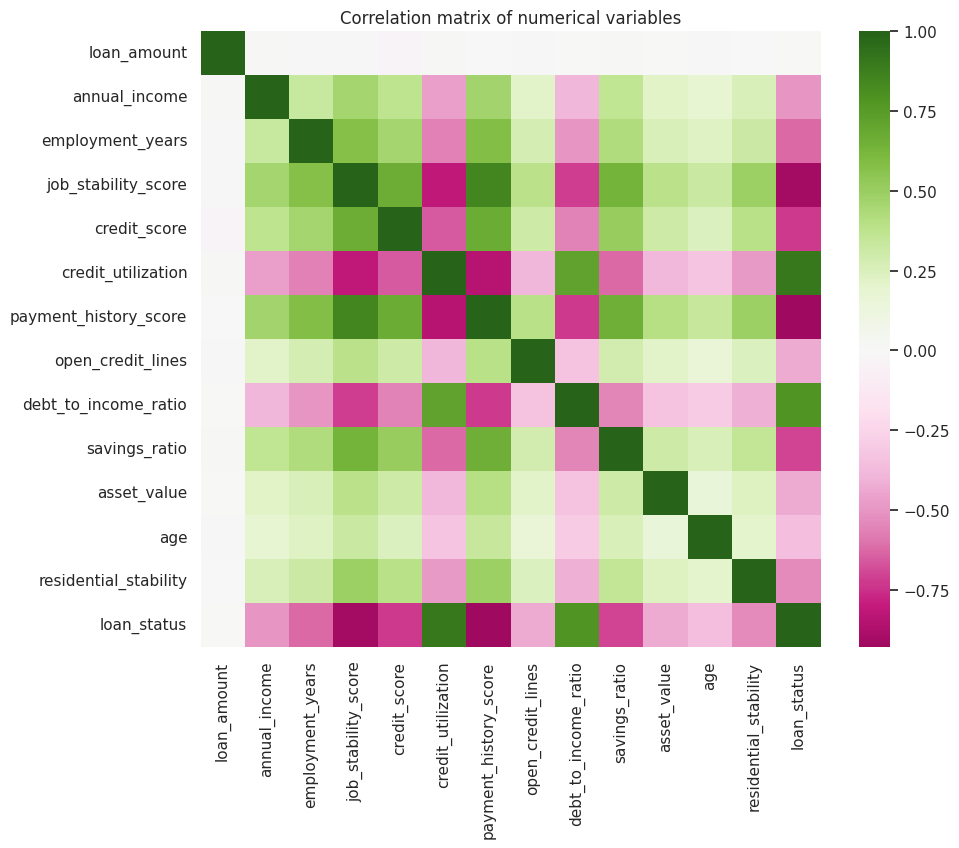

In [ ]:
# Select only numerical columns for correlation analysis
columnas_numericas = tabla.select_dtypes(include=[np.number]).columns

# Compute the correlation matrix between all numerical variables
matriz_correlacion = tabla[columnas_numericas].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=False, cmap="PiYG", center=0)
plt.title("Correlation matrix of numerical variables")

plt.show()


# Section 3

In [ ]:
# Make a working copy of the dataset to avoid modifying the original
tabla_modelo = tabla.copy()

# Convert categorical variables into dummy/one-hot encoded variables
# drop_first=True avoids multicollinearity by removing the first category
tabla_dummies = pd.get_dummies(
    tabla_modelo,
    columns=["education_level", "marital_status"],
    drop_first=True
)

# Preview the transformed dataset
tabla_dummies.head()


,application_id,application_date,loan_amount,annual_income,employment_years,job_stability_score,credit_score,credit_utilization,payment_history_score,open_credit_lines,...,age,residential_stability,loan_status,education_level_Bachelors,education_level_Doctorate,education_level_High School,education_level_Masters,marital_status_Married,marital_status_Single,marital_status_Widowed
0,APP_2328,2022-01-01,132221.82,60451.82,6.6,0.898,679,0.106,0.876,1,...,41,3.5,0,False,False,True,False,True,False,False
1,APP_558,2022-01-01,134906.42,114634.08,10.3,0.808,718,0.030,0.719,4,...,46,11.4,0,False,False,False,True,False,False,False
2,APP_2477,2022-01-01,30285.19,82772.53,12.1,0.964,768,0.174,0.775,6,...,44,8.6,0,False,False,True,False,False,False,True
3,APP_741,2022-01-01,32516.09,94023.36,9.1,0.690,670,0.141,0.993,3,...,26,3.9,0,True,False,False,False,False,True,False
4,APP_145,2022-01-02,77900.99,53515.02,7.2,0.679,651,0.097,0.946,2,...,50,9.6,0,False,False,False,False,False,True,False


In [ ]:
# Define the target variable (what we want to predict)
y = tabla_dummies["loan_status"]

# Columns that should not be used as predictors
columnas_excluir = ["loan_status", "application_id"]

# Select all remaining columns as predictors
columnas_predictoras = [
    col for col in tabla_dummies.columns
    if col not in columnas_excluir
]

# Keep only numeric predictor variables (safer for modeling)
X = tabla_dummies[columnas_predictoras].select_dtypes(include=[np.number])

# Preview the resulting feature matrix
X.head()


,loan_amount,annual_income,employment_years,job_stability_score,credit_score,credit_utilization,payment_history_score,open_credit_lines,debt_to_income_ratio,savings_ratio,asset_value,age,residential_stability
0,132221.82,60451.82,6.6,0.898,679,0.106,0.876,1,0.451,0.500,352569.55,41,3.5
1,134906.42,114634.08,10.3,0.808,718,0.030,0.719,4,0.090,0.235,224364.21,46,11.4
2,30285.19,82772.53,12.1,0.964,768,0.174,0.775,6,0.201,0.172,514765.55,44,8.6
3,32516.09,94023.36,9.1,0.690,670,0.141,0.993,3,0.322,0.368,182541.72,26,3.9
4,77900.99,53515.02,7.2,0.679,651,0.097,0.946,2,0.222,0.324,223691.29,50,9.6


In [ ]:
# Split the data into training and test sets
# test_size=0.2 → 20% of the data is used for testing
# random_state=42 → ensures reproducibility of the split
# stratify=y → keeps the same class proportion in training and test sets
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [ ]:
# Initialize the scaler to standardize the features
escalador = StandardScaler()

# Fit the scaler on the training data and apply the transformation
X_entrenamiento_escalado = escalador.fit_transform(X_entrenamiento)

# Apply the same scaling to the test data (using the training parameters)
X_prueba_escalado = escalador.transform(X_prueba)


In this section, dummy variables were created for the categorical columns, the predictors and target variable were defined, the dataset was split into training (80%) and test (20%) sets, and the numerical variables were standardized to better interpret the LDA/QDA coefficients.


## Section 4: Statistical assumption tests (written discussion)

### 4.1 Multivariate normality

Both **LDA** and **QDA** assume that, within each `loan_status` class, the numerical
variables approximately follow a multivariate normal distribution.

Based on my EDA plots:

- In `credit_score`, **non-defaulters (0)** show a distribution that is quite
  concentrated and bell-shaped around high values (≈ 700–750), while
  **defaulters (1)** cluster at lower values (≈ 500–600), with some skewness.
- In `annual_income`, both groups are clearly shifted: non-defaulters have
  higher incomes and the distribution is right-skewed (long tails of very high
  incomes).
- In `debt_to_income_ratio`, defaulters concentrate at high ratios (≈ 0.6–0.8)
  and non-defaulters at low ratios (≈ 0.2–0.4), also with some skewness.

### 4.2 Homogeneity of covariance matrices

The key difference between LDA and QDA lies in how they treat the **covariance
matrix**:

- **LDA** assumes that **all classes share the same covariance matrix**. That is,
  the joint structure of variances and correlations among the variables is the
  same for good payers and defaulters.
- **QDA** relaxes this assumption and allows **a different covariance matrix for
  each class**, so it can capture different patterns in how the variables relate
  within each group.

In my data, the plots suggest that the two groups not only have different means
but also **different dispersion**:

- The range and variability of `annual_income` and `debt_to_income_ratio` change
  quite a lot between defaulters and non-defaulters (for example, defaulters
  concentrate high debt ratios in a relatively narrow range).
- The correlation matrix also shows strong relationships between financial
  variables (`credit_score`, `payment_history_score`, `credit_utilization`,
  `debt_to_income_ratio`, etc.) that are probably not the same in both groups.

### 4.3 Working hypothesis

> **Hypothesis:** Given that the covariance matrices between defaulters and
> non-defaulters are probably different (due to the different dispersions and
> relationships between variables observed in the plots), we expect QDA to have
> better performance than LDA on the evaluation metrics (especially in the
> ability to identify customers in default).




# Section 5

In [ ]:
# Create the Linear Discriminant Analysis model
modelo_lda = LinearDiscriminantAnalysis()

# Train the model using the standardized training data
modelo_lda.fit(X_entrenamiento_escalado, y_entrenamiento)


LinearDiscriminantAnalysis()

In [ ]:
# Get the predictor variable names
nombres_variables = X.columns.tolist()

# Extract LDA coefficients (one coefficient per variable, since binary classification)
coeficientes_lda = modelo_lda.coef_[0]

# Create a table matching each variable with its coefficient
tabla_coeficientes_lda = pd.DataFrame({
    "variable": nombres_variables,
    "coefficient": coeficientes_lda
})

# Compute the absolute value to measure variable importance
tabla_coeficientes_lda["absolute_importance"] = (
    tabla_coeficientes_lda["coefficient"].abs()
)

# Sort variables by importance (highest to lowest)
tabla_coeficientes_lda_ordenada = tabla_coeficientes_lda.sort_values(
    by="absolute_importance",
    ascending=False
)

# Display the top 10 most influential variables in the model
tabla_coeficientes_lda_ordenada.head(10)


,variable,coefficient,absolute_importance
6,payment_history_score,-15.316354,15.316354
3,job_stability_score,-13.039464,13.039464
5,credit_utilization,11.697030,11.697030
8,debt_to_income_ratio,4.468482,4.468482
4,credit_score,-3.898612,3.898612
9,savings_ratio,-3.106108,3.106108
2,employment_years,-2.367520,2.367520
12,residential_stability,-1.651242,1.651242
1,annual_income,-1.580313,1.580313
7,open_credit_lines,-1.269243,1.269243


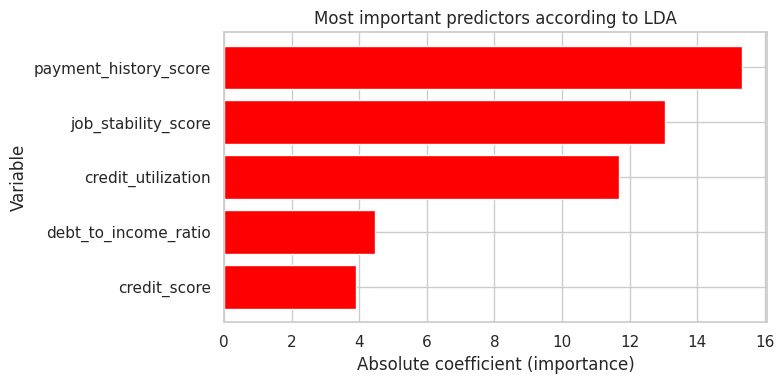

In [ ]:
# Select the top 5 most important variables (based on absolute coefficient)
top_variables = tabla_coeficientes_lda_ordenada.head(5)

plt.figure(figsize=(8, 4))

# Create a horizontal bar plot showing variable importance
plt.barh(
    top_variables["variable"],
    top_variables["absolute_importance"],
    color="red"
)

# Display the most important variable at the top
plt.gca().invert_yaxis()

plt.title("Most important predictors according to LDA")
plt.xlabel("Absolute coefficient (importance)")
plt.ylabel("Variable")

plt.tight_layout()
plt.show()


The main drivers of default risk according to the LDA model are:

1. **payment_history_score** (coefficient ≈ –15.3)  
2. **job_stability_score** (coefficient ≈ –13.0)  
3. **credit_utilization** (coefficient ≈ +11.7)  
4. **debt_to_income_ratio** (coefficient ≈ +4.5)  
5. **credit_score** (coefficient ≈ –3.9)

In this model, the **sign of the coefficient** is interpreted as follows:

- A **positive coefficient** (as in `credit_utilization` and `debt_to_income_ratio`) indicates that,
  when this variable increases, the **probability of default increases**. In other words, higher use
  of available credit and a higher debt-to-income ratio are associated with more risk.

- A **negative coefficient** (as in `payment_history_score`, `job_stability_score`, and
  `credit_score`) indicates that higher values **reduce the probability of default**. In practice,
  better payment history, greater job stability, and a higher credit score act as protective
  factors against default.


# Section 6

In [ ]:
## Section 6: Model 2 – Quadratic Discriminant Analysis (QDA)

# Initialize the Quadratic Discriminant Analysis model
modelo_qda = QuadraticDiscriminantAnalysis()

# Train the model using the standardized training data
modelo_qda.fit(X_entrenamiento_escalado, y_entrenamiento)


QuadraticDiscriminantAnalysis()

## Section 6: Model 2 – Quadratic Discriminant Analysis (QDA)

In this section, I trained a **QDA** model using the same predictor
variables as in LDA and the standardized data (`X_entrenamiento_escalado`, `y_entrenamiento`).

Unlike LDA, QDA allows different covariance matrices for each class,
but it does not produce linear coefficients that are easy to interpret, so
here we focus only on its performance.



# Section 7

In [ ]:
# Predictions and predicted probabilities on the test set

# LDA predictions
predicciones_lda = modelo_lda.predict(X_prueba_escalado)
# Probability of default (class = 1) from LDA
probabilidades_lda = modelo_lda.predict_proba(X_prueba_escalado)[:, 1]

# QDA predictions
predicciones_qda = modelo_qda.predict(X_prueba_escalado)
# Probability of default (class = 1) from QDA
probabilidades_qda = modelo_qda.predict_proba(X_prueba_escalado)[:, 1]


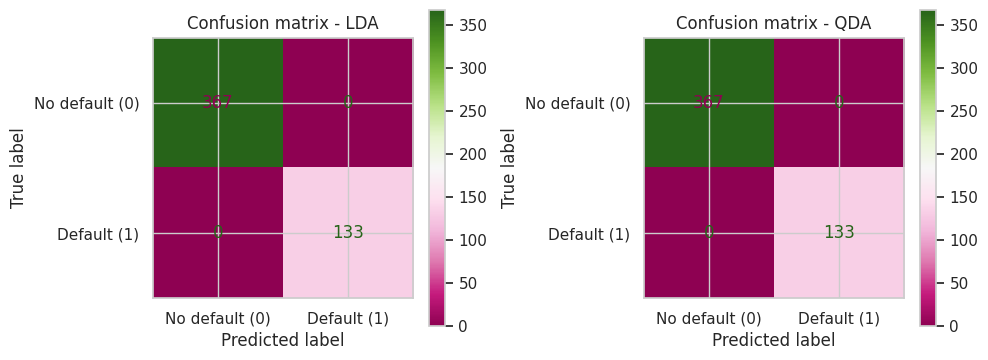

In [ ]:
figura, ejes = plt.subplots(1, 2, figsize=(10, 4))

# LDA confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_prueba,
    predicciones_lda,
    display_labels=["No default (0)", "Default (1)"],
    ax=ejes[0],
    cmap="PiYG"
)
ejes[0].set_title("Confusion matrix - LDA")

# QDA confusion matrix
ConfusionMatrixDisplay.from_predictions(
    y_prueba,
    predicciones_qda,
    display_labels=["No default (0)", "Default (1)"],
    ax=ejes[1],
    cmap="PiYG"
)
ejes[1].set_title("Confusion matrix - QDA")

plt.tight_layout()
plt.show()



AUC LDA: 1.000
AUC QDA: 1.000


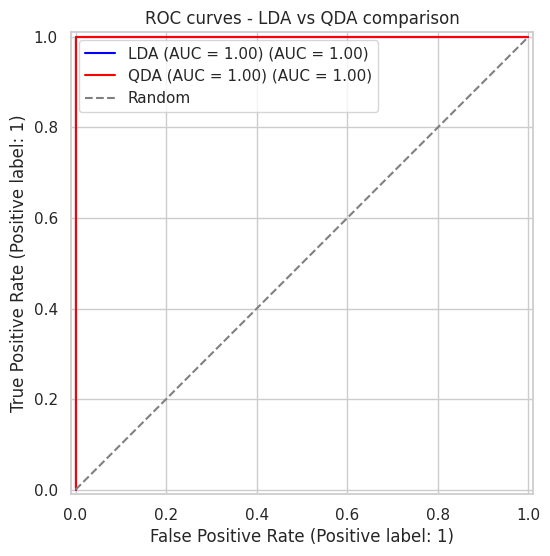

In [ ]:
# Compute AUC scores for both models (higher = better classification performance)
auc_lda = roc_auc_score(y_prueba, probabilidades_lda)
auc_qda = roc_auc_score(y_prueba, probabilidades_qda)

print(f"AUC LDA: {auc_lda:.3f}")
print(f"AUC QDA: {auc_qda:.3f}")

figura, eje = plt.subplots(figsize=(6, 6))

# Plot ROC curve for LDA (blue line)
RocCurveDisplay.from_predictions(
    y_prueba,
    probabilidades_lda,
    name=f"LDA (AUC = {auc_lda:.2f})",
    ax=eje,
    color="blue"
)

# Plot ROC curve for QDA (red line)
RocCurveDisplay.from_predictions(
    y_prueba,
    probabilidades_qda,
    name=f"QDA (AUC = {auc_qda:.2f})",
    ax=eje,
    color="red"
)

# Add a reference diagonal line representing random guessing
eje.plot([0, 1], [0, 1], linestyle="--", color="gray", label="Random")

eje.set_title("ROC curves - LDA vs QDA comparison")
eje.legend()
plt.show()


### Section 7: Model evaluation and comparison

On the test set, **LDA** and **QDA** produced exactly the same results.

- **Confusion matrices:**  
  - 367 **No default (0)** clients were correctly classified as 0.  
  - 133 **Default (1)** clients were correctly classified as 1.  
  - There were **no false positives** and **no false negatives** for either model.

- **Classification metrics (for both models):**  
  - Recall (Default) = **1.00**  
  - Precision (Default) = **1.00**  
  - F1-score (Default) = **1.00**

- **ROC curves:**  
  The ROC curves for LDA and QDA overlap and both have **AUC = 1.00**, showing perfect separation between payers and defaulters.

In summary, on this test dataset **LDA and QDA have identical and perfect performance**, so no difference in predictive ability is observed.


### Section 8: Technical conclusion and model selection

Although the EDA and covariance discussion suggested that **QDA** could have an advantage,
the results in Section 7 show that **LDA and QDA perform identically** on the test set:

- Same confusion matrix (367 correct non-defaults, 133 correct defaults, no errors).
- Same metrics for Default: Recall = 1.00, Precision = 1.00, F1 = 1.00.
- Same ROC performance: AUC LDA = 1.00 and AUC QDA = 1.00.

Given this **identical predictive performance**, I select **LDA** as the preferred model,
because it is **simpler, easier to interpret through its coefficients**, and achieves
the same level of accuracy as QDA on this dataset.



## Team Information
**Team:** [Equipo 5]
**Members:**
- [Cristian Cruz Orozco ] ([A01665590]) - Data Science and Mathematics Engineering
- [Alan Ulises Luna Hernández] ([A01424523]) - Data Science and Mathematics Engineering
- [Axel Palacios Granados] ([A01666972]) - Data Science and Mathematics Engineering

**Deliverable Links:**
- **Presentation Video:** [https://youtu.be/Pp-CgQ5JIC4]
- **Executive Summary:** [Disponible en Canvas]
- **Dataset:** `credit_risk_data-1.csv`
**Completion Date:** 0[9/11/2025]